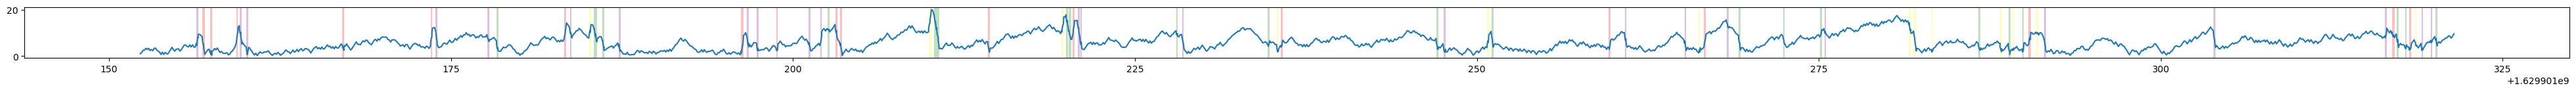

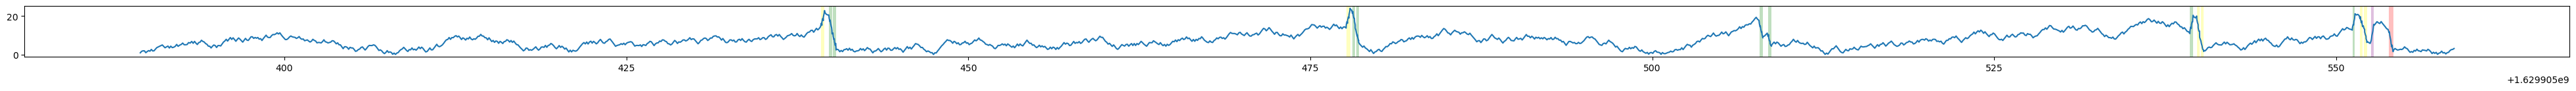

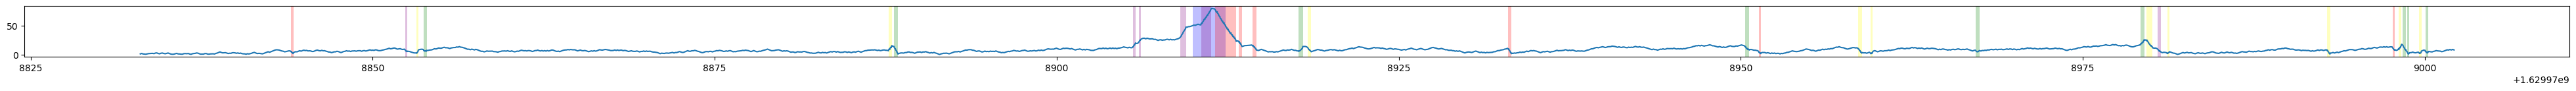

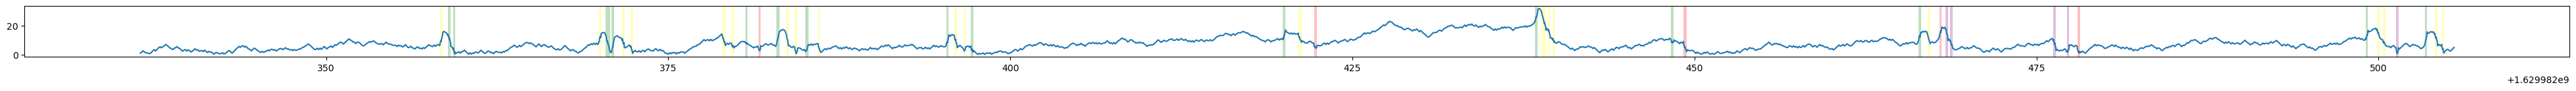

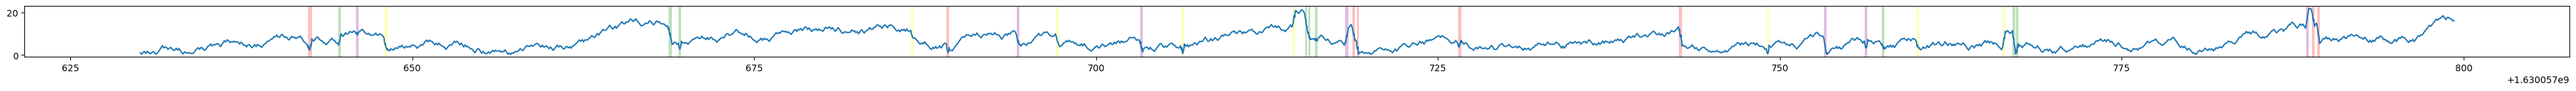

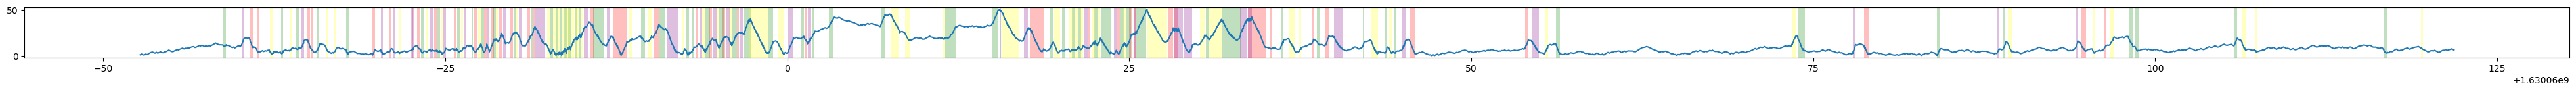

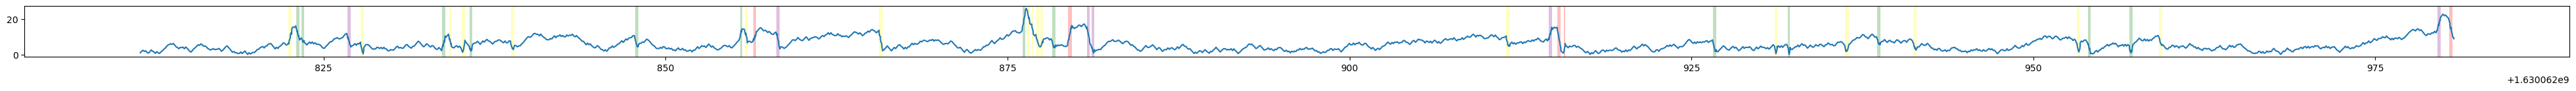

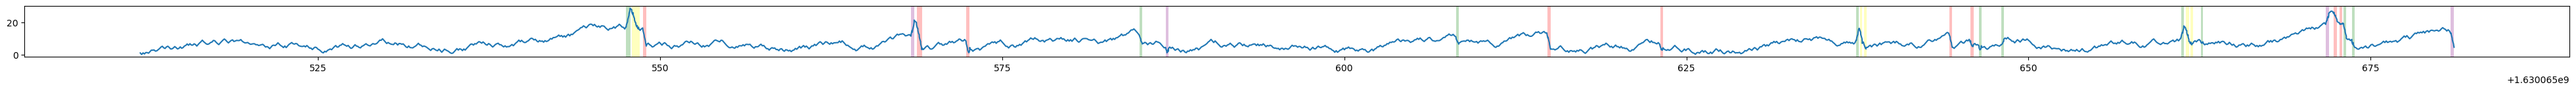

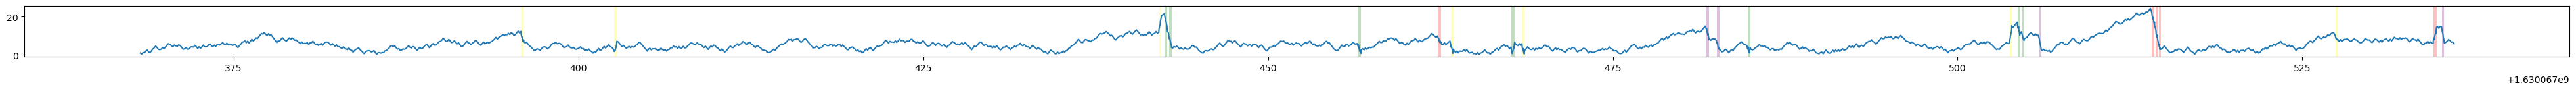

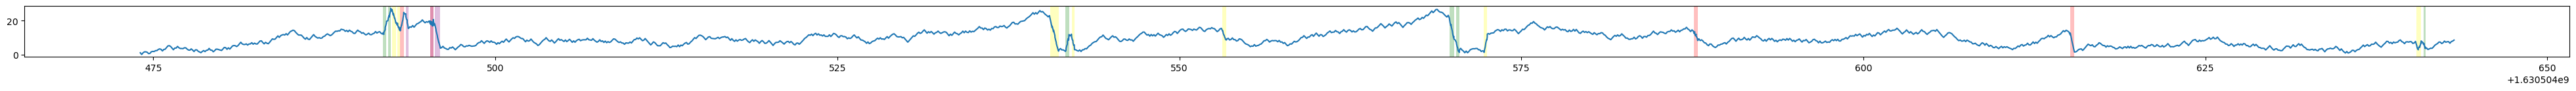

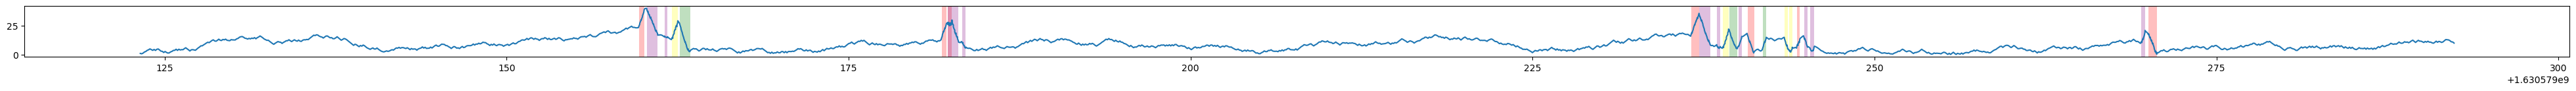

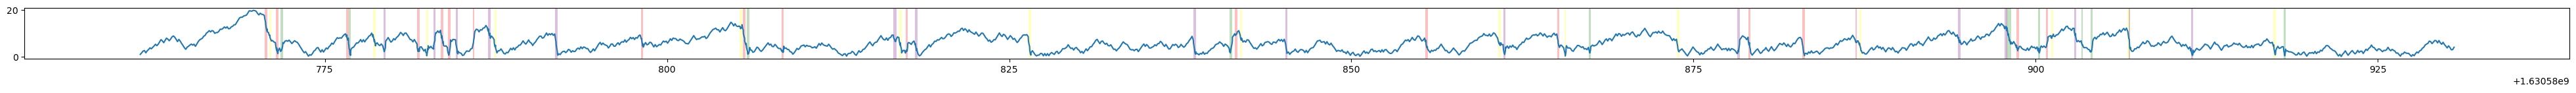

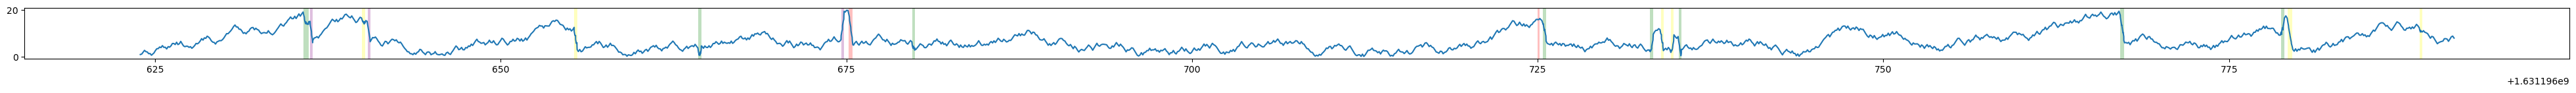

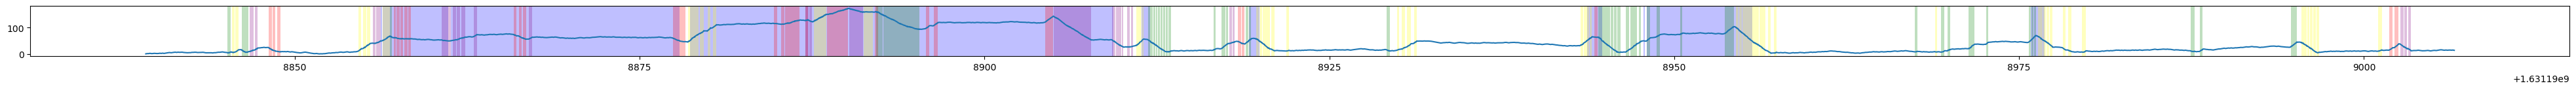

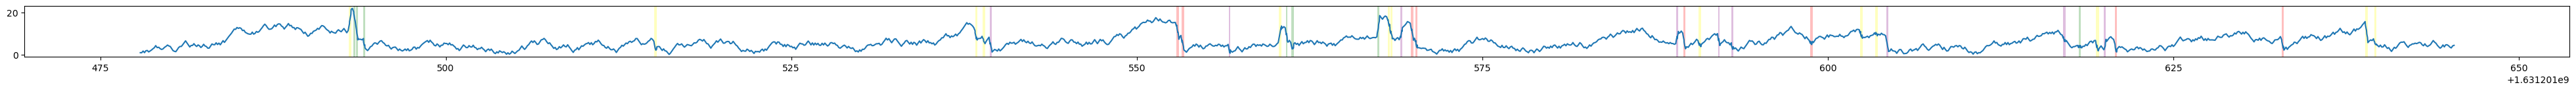

In [2]:
import icua_analysis as ia 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

for trial, tgroup in ia.load_tabularised().has_eyetracking().groupby_trial():
    for par, data in tgroup.items():
        
        tracking_data = data['tracking_data']
        
        plt.figure(figsize=(50,1))
        plt.plot(tracking_data['timestamp'], tracking_data['deviation'])
        #plt.hlines(50, 0, 1)
        
        fi = ia.get_tracking_task_failure_intervals(data)
        ia.plot_intervals(fi[['t1','t2']].to_numpy(), color="blue")
        ki = ia.get_keyboard_intervals(data)
        #print(ki['t2'] - ki['t1'])
        for color, (key, group) in zip(['red', 'green', 'yellow','purple'], ki.groupby('key')):
            ia.plot_intervals(group[['t1','t2']].to_numpy(), color=color)
    break
            
# one measure of how "sane" someone is in this task is to measure the gradient of the distance during a key-press interval.
# we can look at the distribution of gradients, and the vast majority should be negative. 

# the gradient is the same determining the correct direction to move the target based on its position.
# TODO is this actually interesting?
